In [50]:
from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

Automatically created module for IPython interactive environment


In [25]:
import pandas as pd
df = pd.read_csv('shopping_data.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
df = df.drop('Genre', axis=1)

In [27]:
df = df.drop('CustomerID', axis=1)

In [28]:
df = df.drop('Age', axis=1)

In [29]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [30]:
from scipy.stats import zscore
df = df.apply(zscore)

In [31]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


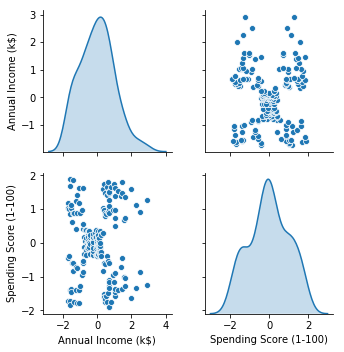

In [32]:
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

In [33]:
from sklearn.cluster import KMeans


# Let us check optimal number of clusters-


cluster_range = range( 1, 20)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,400.000000
1,2,270.026161
2,3,157.704008
3,4,108.921317
4,5,65.568408
5,6,55.103778
6,7,45.334085
7,8,37.151357
8,9,32.377244
9,10,29.772221


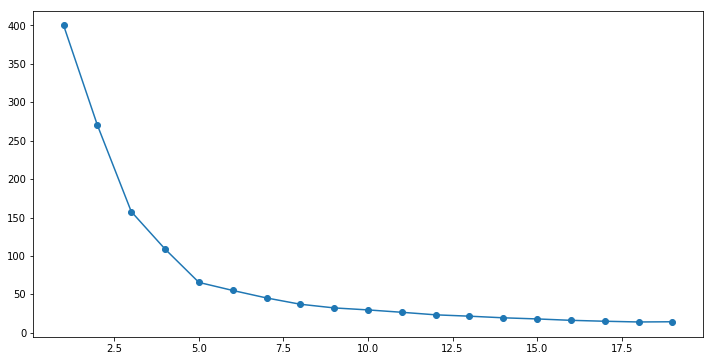

In [34]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [35]:
# Number of clusters

kmeans = KMeans(n_clusters=5)

# Fitting the input data

kmeans = kmeans.fit(df)

# Getting the cluster labels

labels = kmeans.predict(df)

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [ 0.99158305  1.23950275]
 [-0.20091257 -0.02645617]
 [-1.30751869 -1.13696536]]


In [36]:
#Append the prediction 
df["GROUP"] = labels
print("Groups Assigned : \n")
df

Groups Assigned : 



,Annual Income (k$),Spending Score (1-100),GROUP
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,4
5,-1.662660,1.001596,0
6,-1.624491,-1.715913,4
7,-1.624491,1.700384,0
8,-1.586321,-1.832378,4
9,-1.586321,0.846310,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026F908CFB00>,
      dtype=object)

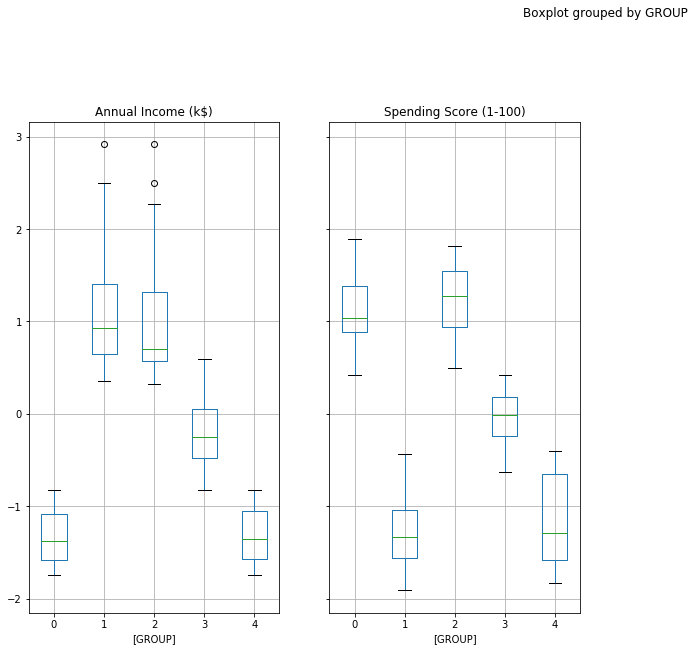

In [37]:
df.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 20))

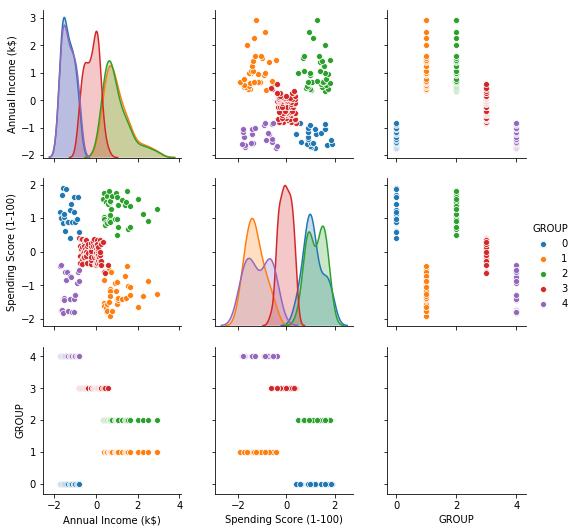

In [38]:
sns.pairplot(df,hue='GROUP')

### Visualize the data

In [39]:
import seaborn as sns
%matplotlib inline

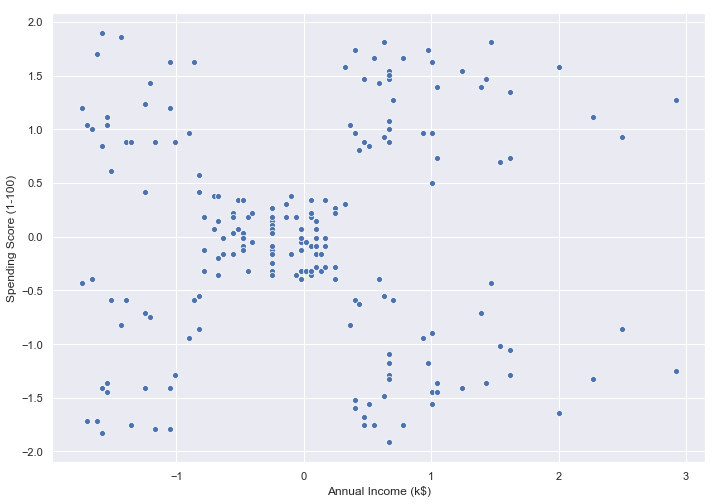

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], data=df, palette='gist_rainbow')

### Building a Dendrogram

In [41]:
import scipy.cluster.hierarchy as shc
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [44]:
df

,Annual Income (k$),Spending Score (1-100),GROUP
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,4
5,-1.662660,1.001596,0
6,-1.624491,-1.715913,4
7,-1.624491,1.700384,0
8,-1.586321,-1.832378,4
9,-1.586321,0.846310,0


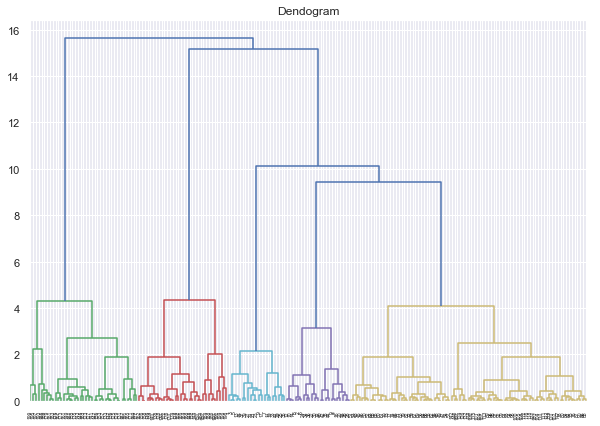

In [58]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend = shc.dendrogram(shc.linkage(df.iloc[:,0:2].values,method='ward'),color_threshold=6)

How many clusters to take?

### Agglomerative Clustering

In [60]:
from sklearn.cluster import AgglomerativeClustering

In [61]:
ac = AgglomerativeClustering(n_clusters=5)

In [62]:
df['Cluster_5'] = ac.fit_predict(df.iloc[:,0:2].values)

In [65]:
df

,Annual Income (k$),Spending Score (1-100),GROUP,Cluster_5
0,-1.738999,-0.434801,4,4
1,-1.738999,1.195704,0,3
2,-1.700830,-1.715913,4,4
3,-1.700830,1.040418,0,3
4,-1.662660,-0.395980,4,4
5,-1.662660,1.001596,0,3
6,-1.624491,-1.715913,4,4
7,-1.624491,1.700384,0,3
8,-1.586321,-1.832378,4,4
9,-1.586321,0.846310,0,3


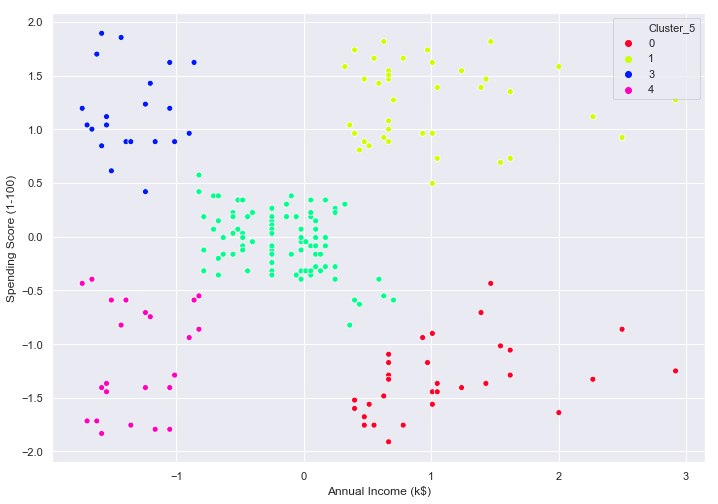

In [63]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster_5'], palette='gist_rainbow')